#### Randomized Block Design

##### Air Traffic Controller Stress Test

A study measuring the fatigue and stress of air traffic controllers resulted in proposals for modification and redesign of the controller's work station.

After consideration of several designs for workstation, three specific alternatives are selected as having the best potential for reducing controller stress.

The key question is: To what extent do the three alternatives differ in terms of their effect on controller stress?

In [1]:
import pandas as pd
import numpy as np
import scipy
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [2]:
df = pd.read_excel('Data Files\RBD.xlsx')
df

,System A,System B,System C
0,15,15,18
1,14,14,14
2,10,11,15
3,13,12,17
4,16,13,16
5,13,13,13


In [3]:
data = pd.melt(df.reset_index(), id_vars=['index'], value_vars=['System A', 'System B', 'System C'])
data.columns = ['index', 'treatments', 'value']

In [4]:
model = ols('value ~ C(treatments)', data=data).fit()

In [5]:
anova_table = sm.stats.anova_lm(model, typ=1)
anova_table

,df,sum_sq,mean_sq,F,PR(>F)
C(treatments),2.0,21.0,10.500000,3.214286,0.068903
Residual,15.0,49.0,3.266667,NaN,NaN


In [6]:
# accept the null hypothesis since 0.068903 > 0.05

Solving RBD example using Python

In [7]:
import pandas as pd
import numpy as np
import scipy
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [8]:
df = pd.read_excel('Data Files\RBD.xlsx')
df

,System A,System B,System C
0,15,15,18
1,14,14,14
2,10,11,15
3,13,12,17
4,16,13,16
5,13,13,13


In [9]:
data = pd.melt(df.reset_index(), id_vars=['index'], value_vars=['System A', 'System B', 'System C'])
data.columns = ['blocks', 'treatments', 'value']

In [10]:
model = ols('value ~ C(blocks)+ C(treatments)', data=data).fit()
anova_table = sm.stats.anova_lm(model, typ=1)
anova_table

,df,sum_sq,mean_sq,F,PR(>F)
C(blocks),5.0,30.0,6.0,3.157895,0.057399
C(treatments),2.0,21.0,10.5,5.526316,0.024181
Residual,10.0,19.0,1.9,NaN,NaN


In [11]:
# reject the null hypothesis

#### Problem 2: RBD

An experiment was performed to determine the effect of 4 different chemicals on the strength of a fabric.

These chemicals are used as part of the permanent press finishing process.

Five fabric samples were selected, and a randomized complete block design was run by testing each chemical type once in random order on each fabric sample.

The data is shown in Table.

We will test for differences in means using an ANOVA with alpha=0.01

In [12]:
df = pd.read_excel('Data Files\Rbd2.xlsx')
df

,chem1,chem2,chem3,chem4
0,1.3,2.2,1.8,3.9
1,1.6,2.4,1.7,4.4
2,0.5,0.4,0.6,2.0
3,1.2,2.0,1.5,4.1
4,1.1,1.8,1.3,3.4


In [13]:
data = pd.melt(df.reset_index(), id_vars=['index'], value_vars=['chem1', 'chem2', 'chem3', 'chem4'])
data.columns = ['index', 'treatments', 'value']

In [14]:
model = ols('value ~ C(treatments)', data=data).fit()
aov_table = sm.stats.anova_lm(model, typ=1)
aov_table

,df,sum_sq,mean_sq,F,PR(>F)
C(treatments),3.0,18.044,6.014667,12.589569,0.000176
Residual,16.0,7.644,0.477750,NaN,NaN


RBD Method for problem 2

In [25]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
df = pd.read_excel('Data Files\Rbd2.xlsx')
df

,chem1,chem2,chem3,chem4
0,1.3,2.2,1.8,3.9
1,1.6,2.4,1.7,4.4
2,0.5,0.4,0.6,2.0
3,1.2,2.0,1.5,4.1
4,1.1,1.8,1.3,3.4


In [17]:
data = pd.melt(df.reset_index(), id_vars=['index'], value_vars=['chem1', 'chem2', 'chem3', 'chem4'])
data.columns = ['Fabric', 'Chemical', 'value']
data

,Fabric,Chemical,value
0,0,chem1,1.3
1,1,chem1,1.6
2,2,chem1,0.5
3,3,chem1,1.2
4,4,chem1,1.1
5,0,chem2,2.2
6,1,chem2,2.4
7,2,chem2,0.4
8,3,chem2,2.0
9,4,chem2,1.8


In [18]:
model = ols('value ~ C(Fabric) + C(Chemical)', data=data).fit()
anova_table = sm.stats.anova_lm(model, typ=1)
anova_table

,df,sum_sq,mean_sq,F,PR(>F)
C(Fabric),4.0,6.693,1.673250,21.113565,2.318913e-05
C(Chemical),3.0,18.044,6.014667,75.894848,4.518310e-08
Residual,12.0,0.951,0.079250,NaN,NaN


### Two Way ANOVA

In [19]:
df2 = pd.read_excel('Data Files\Twoway.xlsx')
df2

,Value,prep_pro,college
0,500,three_hr,Business
1,580,three_hr,Business
2,540,three_hr,Engineering
3,460,three_hr,Engineering
4,480,three_hr,Artsandscience
5,400,three_hr,Artsandscience
6,460,One-day,Business
7,540,One-day,Business
8,560,One-day,Engineering
9,620,One-day,Engineering


In [20]:
formula = 'Value ~ C(college) + C(prep_pro) + C(college):C(prep_pro)'
model = ols(formula, df2).fit()

In [21]:
aov_table = anova_lm(model, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
C(college),45300.0,2.0,10.269521,0.004757
C(prep_pro),6100.0,2.0,1.382872,0.299436
C(college):C(prep_pro),11200.0,4.0,1.269521,0.350328
Residual,19850.0,9.0,NaN,NaN


### Linear Regression

In [23]:
data = pd.read_excel('Data Files\Reg2.xlsx')
data

,Hydrocarbon level,O2
0,0.99,90.01
1,1.02,89.05
2,1.15,91.43
3,1.29,93.74
4,1.46,96.73
5,1.36,94.45
6,0.87,87.59
7,1.23,91.77
8,1.55,99.42
9,1.40,93.65


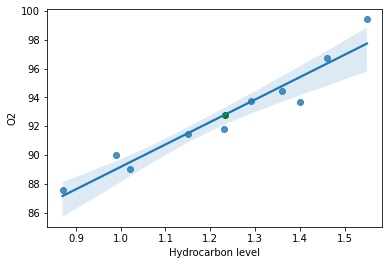

In [31]:
x = data['Hydrocarbon level']
y = data['O2']

plt.figure()
sns.regplot(x=x, y=y, fit_reg=True)
plt.scatter(np.mean(x), np.mean(y), color="green")